<a href="https://colab.research.google.com/github/brunamulinari/TechLabsProject_PsiData/blob/main/PsiData_Curitiba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistema E-Saude - Perfil de atendimento nas Unidades Municipais de Curitiba

E-Saúde é um sistema para **automatização de agendamento de consultas e realização de teleconsultas**. Foi criado em 2020.

Base de dados do sistema Informatizado "E-saúde":

Atendimentos prestados pela **Secretaria Municipal de Saúde de Curitiba** em sua rede de atenção. Esta rede é composta por Unidades Básicas de Saúde, Unidades de Pronto Atendimento, Centros de Especialidades Médicas e Odontológicas, entre outros. Os dados disponibilizados para consulta referem-se ao perfil de atendimento dos profissionais de nível superior da rede municipal de saúde. 

Arquivo atualizado mensalmente
(Versão usada: atualizado em 06/06/2021)

Dados retirados de https://www.curitiba.pr.gov.br/dadosabertos/busca/?pagina=8 (Acesso em junho de 2021)

Informação das colunas (Atualizado em 06/09/2019)


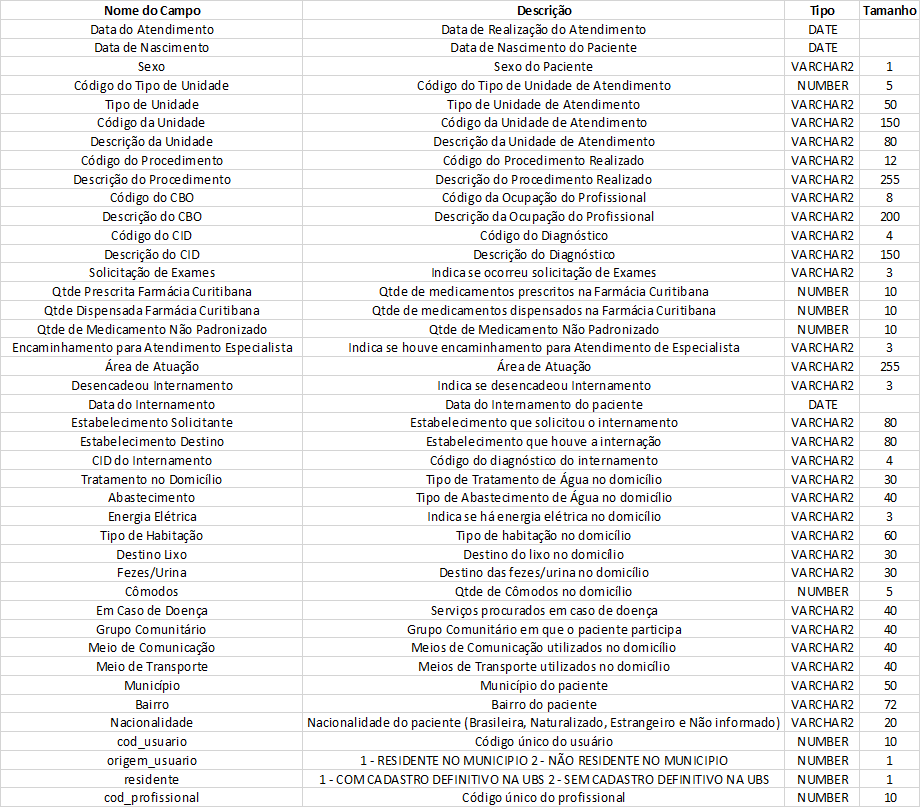

## Importando e arrumando os dados

In [1]:
#Importando dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#df_cwb = pd.read_excel("/content/2021-05-06_Sistema_E-Saude_Outros_Niveis_Superior_-_Base_de_Dados.xlsx")
df_cwb1 = pd.read_excel("/content/drive/MyDrive/ciencia de dados/2021-05-06_Sistema_E-Saude_Outros_Niveis_Superior_-_Base_de_Dados.xlsx")
df_cwb2 = pd.read_excel("/content/drive/MyDrive/ciencia de dados/2021-06-06_Sistema_E-Saude_Outros_Niveis_Superior_-_Base_de_Dados.xlsx")

In [2]:
df_cwb = pd.concat([df_cwb1, df_cwb2], ignore_index=True)

In [3]:
df_cwb.shape

(39813, 42)

In [4]:
df_cwb.head()

,Data do Atendimento,Data de Nascimento,Sexo,Código do Tipo de Unidade,Tipo de Unidade,Código da Unidade,Descrição da Unidade,Código do Procedimento,Descrição do Procedimento,Código do CBO,Descrição do CBO,Código do CID,Descrição do CID,Solicitação de Exames,Qtde Prescrita Farmácia Curitibana,Qtde Dispensada Farmácia Curitibana,Qtde de Medicamento Não Padronizado,Encaminhamento para Atendimento Especialista,Área de Atuação,Desencadeou Internamento,Data do Internamento,Estabelecimento Solicitante,Estabelecimento Destino,CID do Internamento,Tratamento no Domicílio,Abastecimento,Energia Elétrica,Tipo de Habitação,Destino Lixo,Fezes/Urina,Cômodos,Em Caso de Doença,Grupo Comunitário,Meio de Comunicacao,Meio de Transporte,Municício,Bairro,Nacionalidade,cod_usuario,origem_usuario,residente,cod_profissional
0,2020-12-01 07:24:16,1929-06-27,M,1,BASICO,17043,UMS TRINDADE PSF,301010030,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,223810,FONOAUDIOLOGO,NaN,NaN,Sim,0,0,0,Nao,NaN,Nao,NaN,NaN,NaN,NaN,NaN,NaN,Sim,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,CURITIBA,CAJURU,Brasileira,920303,1,1,43471
1,2020-12-01 14:43:12,1955-06-30,F,1,BASICO,16764,UMS VILA GUAIRA,301010030,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,223710,NUTRICIONISTA,NaN,NaN,Sim,0,0,0,Nao,NaN,Nao,NaN,NaN,NaN,NaN,SEM TRATAMENTO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5.0,OUTROS,NAO PARTICIPA,"TELEVISAO,RADIO",ONIBUS,CURITIBA,AGUA VERDE,Brasileira,1974553,1,1,58324
2,2020-12-01 08:47:42,1979-12-07,M,1,BASICO,17124,UMS ESMERALDA,301010030,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,223605,FISIOTERAPEUTA GERAL,NaN,NaN,Sim,0,0,0,Sim,FISIOTERAPIA - ATENÇÃO ESPECIALIZADA,Nao,NaN,NaN,NaN,NaN,FILTRACAO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5.0,UNIDADE DE SAUDE,GRUPO RELIGIOSO,TELEVISAO,ONIBUS,CURITIBA,XAXIM,Brasileira,757392,1,1,40885
3,2020-12-01 09:48:27,1960-02-25,F,1,BASICO,17124,UMS ESMERALDA,301010030,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,223605,FISIOTERAPEUTA GERAL,NaN,NaN,Sim,0,0,0,Sim,FISIOTERAPIA - ATENÇÃO ESPECIALIZADA,Nao,NaN,NaN,NaN,NaN,FILTRACAO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,CÉU ABERTO,6.0,UNIDADE DE SAUDE,OUTROS,TELEVISAO,ONIBUS,CURITIBA,XAXIM,Brasileira,81810,1,1,40885
4,2020-12-01 10:26:58,1981-12-11,M,1,BASICO,17124,UMS ESMERALDA,301010030,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,223605,FISIOTERAPEUTA GERAL,NaN,NaN,Sim,0,0,0,Sim,FISIOTERAPIA - ATENÇÃO ESPECIALIZADA,Nao,NaN,NaN,NaN,NaN,CLORACAO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,3.0,"UNIDADE DE SAUDE,HOSPITAL",OUTROS,"TELEVISAO,RADIO,OUTROS","ONIBUS,CARRO",CURITIBA,XAXIM,Brasileira,82880,1,1,40885


In [5]:
# Adquirindo a idade das pessoas 

from dateutil.relativedelta import *
from datetime import date

today = date.today()
ages = pd.Series([])


for i in range(0,(df_cwb.shape[0])):

  dob = df_cwb.iloc[i,1]
  age = relativedelta(today, dob)
  ages[i] = age.years  

df_cwb['Idade'] = ages



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


In [6]:
#adquirindo mês das consultas

df_cwb['Mês da consulta'] = pd.DatetimeIndex(df_cwb['Data do Atendimento']).month

## Análise descritiva dos dados

In [ ]:
df_cwb.head()

,Data do Atendimento,Data de Nascimento,Sexo,Código do Tipo de Unidade,Tipo de Unidade,Código da Unidade,Descrição da Unidade,Código do Procedimento,Descrição do Procedimento,Código do CBO,Descrição do CBO,Código do CID,Descrição do CID,Solicitação de Exames,Qtde Prescrita Farmácia Curitibana,Qtde Dispensada Farmácia Curitibana,Qtde de Medicamento Não Padronizado,Encaminhamento para Atendimento Especialista,Área de Atuação,Desencadeou Internamento,Data do Internamento,Estabelecimento Solicitante,Estabelecimento Destino,CID do Internamento,Tratamento no Domicílio,Abastecimento,Energia Elétrica,Tipo de Habitação,Destino Lixo,Fezes/Urina,Cômodos,Em Caso de Doença,Grupo Comunitário,Meio de Comunicacao,Meio de Transporte,Municício,Bairro,Nacionalidade,cod_usuario,origem_usuario,residente,cod_profissional,Idade,Mês da consulta
0,2020-12-01 07:24:16,1929-06-27,M,1,BASICO,17043,UMS TRINDADE PSF,301010030,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,223810,FONOAUDIOLOGO,NaN,NaN,Sim,0,0,0,Nao,NaN,Nao,NaN,NaN,NaN,NaN,NaN,NaN,Sim,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,CURITIBA,CAJURU,Brasileira,920303,1,1,43471,91,12
1,2020-12-01 14:43:12,1955-06-30,F,1,BASICO,16764,UMS VILA GUAIRA,301010030,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,223710,NUTRICIONISTA,NaN,NaN,Sim,0,0,0,Nao,NaN,Nao,NaN,NaN,NaN,NaN,SEM TRATAMENTO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5.0,OUTROS,NAO PARTICIPA,"TELEVISAO,RADIO",ONIBUS,CURITIBA,AGUA VERDE,Brasileira,1974553,1,1,58324,65,12
2,2020-12-01 08:47:42,1979-12-07,M,1,BASICO,17124,UMS ESMERALDA,301010030,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,223605,FISIOTERAPEUTA GERAL,NaN,NaN,Sim,0,0,0,Sim,FISIOTERAPIA - ATENÇÃO ESPECIALIZADA,Nao,NaN,NaN,NaN,NaN,FILTRACAO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5.0,UNIDADE DE SAUDE,GRUPO RELIGIOSO,TELEVISAO,ONIBUS,CURITIBA,XAXIM,Brasileira,757392,1,1,40885,41,12
3,2020-12-01 09:48:27,1960-02-25,F,1,BASICO,17124,UMS ESMERALDA,301010030,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,223605,FISIOTERAPEUTA GERAL,NaN,NaN,Sim,0,0,0,Sim,FISIOTERAPIA - ATENÇÃO ESPECIALIZADA,Nao,NaN,NaN,NaN,NaN,FILTRACAO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,CÉU ABERTO,6.0,UNIDADE DE SAUDE,OUTROS,TELEVISAO,ONIBUS,CURITIBA,XAXIM,Brasileira,81810,1,1,40885,61,12
4,2020-12-01 10:26:58,1981-12-11,M,1,BASICO,17124,UMS ESMERALDA,301010030,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,223605,FISIOTERAPEUTA GERAL,NaN,NaN,Sim,0,0,0,Sim,FISIOTERAPIA - ATENÇÃO ESPECIALIZADA,Nao,NaN,NaN,NaN,NaN,CLORACAO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,3.0,"UNIDADE DE SAUDE,HOSPITAL",OUTROS,"TELEVISAO,RADIO,OUTROS","ONIBUS,CARRO",CURITIBA,XAXIM,Brasileira,82880,1,1,40885,39,12


In [ ]:
df_cwb.shape

(39813, 44)

In [ ]:
# Quantidade de dados em cada coluna, tipo da variável
df_cwb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39813 entries, 0 to 39812
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Data do Atendimento                           39813 non-null  datetime64[ns]
 1   Data de Nascimento                            39813 non-null  datetime64[ns]
 2   Sexo                                          39813 non-null  object        
 3   Código do Tipo de Unidade                     39813 non-null  int64         
 4   Tipo de Unidade                               39813 non-null  object        
 5   Código da Unidade                             39813 non-null  int64         
 6   Descrição da Unidade                          39813 non-null  object        
 7   Código do Procedimento                        39813 non-null  int64         
 8   Descrição do Procedimento                     39813 non-null  obje

In [ ]:
# Análise das variáveis quantitativas
df_cwb.describe()

,Código do Tipo de Unidade,Código da Unidade,Código do Procedimento,Código do CBO,Código do CID,Descrição do CID,Qtde Prescrita Farmácia Curitibana,Qtde Dispensada Farmácia Curitibana,Qtde de Medicamento Não Padronizado,Data do Internamento,Estabelecimento Solicitante,Estabelecimento Destino,CID do Internamento,Cômodos,cod_usuario,origem_usuario,residente,cod_profissional,Idade,Mês da consulta
count,39813.000000,3.981300e+04,3.981300e+04,39813.000000,0.0,0.0,39813.000000,39813.000000,39813.0,0.0,0.0,0.0,0.0,39365.000000,3.981300e+04,39813.000000,39813.000000,39813.000000,39813.000000,39813.000000
mean,1.367820,1.114881e+06,3.696388e+08,235735.529350,NaN,NaN,20.892723,2.675985,0.0,NaN,NaN,NaN,NaN,5.404471,5.224686e+06,1.001758,1.033080,48189.352875,39.880064,4.318263
std,0.774799,2.053179e+06,1.731206e+08,23060.567391,NaN,NaN,492.459035,25.988920,0.0,NaN,NaN,NaN,NaN,3.923670,3.907331e+06,0.041895,0.178847,21056.917624,23.347013,3.338027
min,1.000000,1.546600e+04,1.010100e+08,22410.000000,NaN,NaN,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,0.000000,8.700000e+01,1.000000,1.000000,20879.000000,0.000000,1.000000
25%,1.000000,1.676400e+04,3.010100e+08,223605.000000,NaN,NaN,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,5.000000,1.283311e+06,1.000000,1.000000,39494.000000,19.000000,2.000000
50%,1.000000,1.710800e+04,3.010100e+08,223810.000000,NaN,NaN,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,5.000000,4.718881e+06,1.000000,1.000000,43348.000000,40.000000,3.000000
75%,1.000000,2.639378e+06,3.010102e+08,251510.000000,NaN,NaN,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,6.000000,9.179212e+06,1.000000,1.000000,54101.000000,59.000000,5.000000
max,3.000000,9.381015e+06,8.020300e+08,251605.000000,NaN,NaN,55350.000000,1152.000000,0.0,NaN,NaN,NaN,NaN,568.000000,1.103826e+07,2.000000,2.000000,105432.000000,102.000000,12.000000


In [ ]:
# Análise das variáveis qualitativas
df_cwb.describe(include=['object'])

,Sexo,Tipo de Unidade,Descrição da Unidade,Descrição do Procedimento,Descrição do CBO,Solicitação de Exames,Encaminhamento para Atendimento Especialista,Área de Atuação,Desencadeou Internamento,Tratamento no Domicílio,Abastecimento,Energia Elétrica,Tipo de Habitação,Destino Lixo,Fezes/Urina,Em Caso de Doença,Grupo Comunitário,Meio de Comunicacao,Meio de Transporte,Municício,Bairro,Nacionalidade
count,39813,39813,39813,39813,39813,39813,39813,7101,39813,35886,35890,39813,35893,35892,35892,35891,35891,35891,35891,39813,39813,39813
unique,2,3,112,17,8,2,2,17,1,4,5,2,8,4,6,70,5,7,30,21,111,4
top,F,BASICO,CENTRO DE ESPECIALIDADES MEDICAS ENCANTAR,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,PSICOLOGO CLINICO,Nao,Nao,FISIOTERAPIA - ATENÇÃO ESPECIALIZADA,Nao,SEM TRATAMENTO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,UNIDADE DE SAUDE,NAO PARTICIPA,"TELEVISAO,RADIO",ONIBUS,CURITIBA,CIDADE INDUSTRIAL,Brasileira
freq,25115,32490,5705,15451,19186,26613,32513,3947,39813,18952,35160,37584,32443,35403,33795,17317,25446,13028,19273,39743,7160,39198


Aqui já podemos ver algumas informações, como:

A maioria é mulher, o profissional mais requisitado é o psicólogo clínico,

a maioria não tem tratamento de água, maioria de Curitiba do bairro CIC.

Analisando a data das consultas:

In [ ]:
df_cwb['Mês da consulta'].value_counts()

5     8003
2     7848
3     6850
4     6057
1     5566
12    5489
Name: Mês da consulta, dtype: int64

Text(0, 0.5, 'Idade')

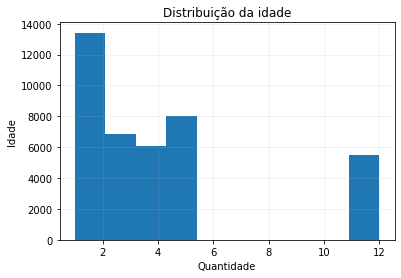

In [ ]:
# Distribuição das idades para consultas de psicologia
df_cwb['Mês da consulta'].hist()
plt.grid(alpha=0.2)
plt.title('Distribuição da idade')
plt.xlabel("Quantidade")
plt.ylabel("Idade")

Agora vamos ver a quantidade de valores de algumas colunas:

In [ ]:
df_cwb['Sexo'].value_counts()

F    25115
M    14698
Name: Sexo, dtype: int64

In [ ]:
df_cwb['Idade'].value_counts()

0      1165
59      625
65      614
52      610
57      602
       ... 
95        5
98        2
100       2
101       1
102       1
Name: Idade, Length: 103, dtype: int64

In [ ]:
df_cwb['Descrição do CBO'].value_counts()

PSICOLOGO CLINICO                           19186
FISIOTERAPEUTA GERAL                        10280
NUTRICIONISTA                                4735
FARMACEUTICO                                 3898
FONOAUDIOLOGO                                1058
PROFISSIONAL DE EDUCACAO FISICA NA SAUDE      294
ASSISTENTE SOCIAL                             241
TERAPEUTA OCUPACIONAL                         121
Name: Descrição do CBO, dtype: int64

In [ ]:
df_cwb['Tratamento no Domicílio'].value_counts()

SEM TRATAMENTO    18952
CLORACAO           8381
FILTRACAO          8334
FERVURA             219
Name: Tratamento no Domicílio, dtype: int64

In [ ]:
df_cwb['Energia Elétrica'].value_counts()

Sim    37584
Nao     2229
Name: Energia Elétrica, dtype: int64

In [ ]:
df_cwb['Tipo de Habitação'].value_counts()

TIJOLO/ALVENARIA COM REVESTIMENTO    32443
MADEIRA APARELHADA                    2257
TIJOLO ALVENARIA SEM REVESTIMENTO      670
OUTRO MATERIAL                         368
MATERIAL APROVEITADO                    93
TAIPA COM REVESTIMENTO                  40
TAIPA SEM REVESTIMENTO                  14
PALHA                                    8
Name: Tipo de Habitação, dtype: int64

In [ ]:
df_cwb['Destino Lixo'].value_counts()

COLETADO              35403
OUTROS                  383
CÉU ABERTO               64
QUEIMADO/ENTERRADO       42
Name: Destino Lixo, dtype: int64

In [ ]:
df_cwb['Fezes/Urina'].value_counts()

SISTEMA DE ESGOTO               33795
FOSSA SÉPTICA                    1265
OUTROS                            507
CÉU ABERTO                        300
DIRETO PARA RIO, LAGO OU MAR       14
FOSSA RUDIMENTAR                   11
Name: Fezes/Urina, dtype: int64

In [ ]:
df_cwb['Bairro'].value_counts()

CIDADE INDUSTRIAL       7160
SITIO CERCADO           3275
CAJURU                  2359
UBERABA                 1554
BOQUEIRAO               1524
                        ... 
VILA BANCARIA              1
SANTA TEREZINHA            1
PRINCIPAL                  1
SAO DOMINGOS               1
FERRARIA CAMPO LARGO       1
Name: Bairro, Length: 111, dtype: int64

In [ ]:
df_cwb['Municício'].value_counts()

CURITIBA                 39743
PINHAIS                     10
SAO JOSE DOS PINHAIS         9
COLOMBO                      9
CAMPO MAGRO                  6
CAMPO LARGO                  5
ARAUCARIA                    4
RIO BRANCO DO SUL            4
ALMIRANTE TAMANDARE          3
MANDIRITUBA                  3
BALSA NOVA                   3
FAZENDA RIO GRANDE           3
NAO INFORMADO                3
CAMPINA GRANDE DO SUL        1
UMUARAMA                     1
PIRAQUARA                    1
QUATRO BARRAS                1
PAULA FREITAS                1
TUNEIRAS DO OESTE            1
CONTENDA                     1
TUNAS DO PARANA              1
Name: Municício, dtype: int64

In [ ]:
df_cwb['Nacionalidade'].value_counts()

Brasileira       39198
Não informado      313
Estrangeiro        298
Naturalizado         4
Name: Nacionalidade, dtype: int64

## Limpeza dos dados

### Removendo valores nulos

In [74]:
# Análise da quantidade de valores nulos
# Soma de valores nulos em cada coluna

df_cwb.isnull().sum()

Data do Atendimento        0
Data de Nascimento         0
Sexo                       0
Descrição do CBO           0
Tratamento no Domicílio    0
Abastecimento              0
Energia Elétrica           0
Tipo de Habitação          0
Destino Lixo               0
Fezes/Urina                0
Cômodos                    0
Em Caso de Doença          0
Grupo Comunitário          0
Meio de Comunicacao        0
Meio de Transporte         0
Municício                  0
Bairro                     0
Nacionalidade              0
Idade                      0
Mês da consulta            0
Psicologo                  0
dtype: int64

In [75]:
# Colunas totalmente vazias: remover

df_cwb.drop(columns = ['Área de Atuação','Código do CID', 'Descrição do CID', 'Data do Internamento', 'Estabelecimento Solicitante', 'Estabelecimento Destino','CID do Internamento'], inplace = True)

KeyError: ignored

In [ ]:
df_cwb.isnull().sum()

In [ ]:
# Coluna Tratamento no Domicílio
df_cwb['Tratamento no Domicílio'].value_counts()


In [ ]:
df_cwb['Tratamento no Domicílio'].describe()

In [ ]:
# Temos 1917 valores nulos, vamos substituir por SEM TRATAMENTO

df_cwb['Tratamento no Domicílio'].replace(np.nan, 'SEM TRATAMENTO', inplace=True)

In [ ]:
# Coluna Abastecimento

df_cwb['Abastecimento'].value_counts()

In [ ]:
# Temos 1913 valores nulos, vamos substituir por REDE PÚBLICA

df_cwb['Abastecimento'].replace(np.nan, 'REDE PÚBLICA', inplace=True)

In [ ]:
# Coluna Tipo de Habitação

df_cwb['Tipo de Habitação'].value_counts()

In [ ]:
# Temos 1911 valores nulos, vamos substituir por TIJOLO/ALVENARIA COM REVESTIMENTO

df_cwb['Tipo de Habitação'].replace(np.nan, 'TIJOLO/ALVENARIA COM REVESTIMENTO', inplace=True)

In [ ]:
# Coluna Destino Lixo

df_cwb['Destino Lixo'].value_counts()

In [ ]:
# Temos 1912 valores nulos, vamos substituir por COLETADO

df_cwb['Destino Lixo'].replace(np.nan, 'COLETADO', inplace=True)

In [ ]:
# Coluna Fezes/Urina

df_cwb['Fezes/Urina'].value_counts()

In [ ]:
# Temos 1912 valores nulos, vamos substituir por SISTEMA DE ESGOTO

df_cwb['Fezes/Urina'].replace(np.nan, 'SISTEMA DE ESGOTO', inplace=True)

In [ ]:
# Coluna Cômodos
df_cwb['Cômodos'].describe()

In [ ]:
# Temos 156 valores nulos, vamos substituir pelo 50%, que é 5

df_cwb['Cômodos'].replace(np.nan, 5, inplace=True)

In [ ]:
# Coluna Em Caso de Doença

df_cwb['Em Caso de Doença'].value_counts()

In [ ]:
# Temos 1913 valores nulos, vamos substituir por UNIDADE DE SAUDE

df_cwb['Em Caso de Doença'].replace(np.nan, 'UNIDADE DE SAUDE', inplace=True)

In [ ]:
# Coluna Grupo Comunitário

df_cwb['Grupo Comunitário'].value_counts()

In [ ]:
# Temos 1913 valores nulos, vamos substituir por NAO PARTICIPA 

df_cwb['Grupo Comunitário'].replace(np.nan, 'NAO PARTICIPA', inplace=True)

In [ ]:
# Coluna Meio de Comunicacao

df_cwb['Meio de Comunicacao'].value_counts()

In [ ]:
# Temos 1913 valores nulos, vamos substituir por TELEVISAO,RADIO

df_cwb['Meio de Comunicacao'].replace(np.nan, 'TELEVISAO,RADIO', inplace=True)

In [ ]:
# Coluna Meio de Transporte 

df_cwb['Meio de Transporte'].value_counts()

In [ ]:
# Temos 1913 valores nulos, vamos substituir por ONIBUS

df_cwb['Meio de Transporte'].replace(np.nan, 'ONIBUS', inplace=True)

In [ ]:
df_cwb.isnull().sum()

### Removendo variáveis que não seriam úteis para a pesquisa

In [ ]:
df_cwb.drop(columns = ['Código do Tipo de Unidade','Tipo de Unidade','Código da Unidade','Descrição da Unidade','Código do Procedimento','Código do CBO','Descrição do Procedimento','Desencadeou Internamento','cod_usuario', 'cod_profissional','Código da Unidade','origem_usuario','residente','Solicitação de Exames','Qtde Prescrita Farmácia Curitibana','Qtde Dispensada Farmácia Curitibana','Qtde de Medicamento Não Padronizado','Encaminhamento para Atendimento Especialista'], inplace = True)

## Criando uma tabela apenas das consultas de psicologia

In [36]:
df_psi = df_cwb.loc[df_cwb['Descrição do CBO'] == 'PSICOLOGO CLINICO']

In [37]:
df_psi.columns

Index(['Data do Atendimento', 'Data de Nascimento', 'Sexo', 'Descrição do CBO',
       'Tratamento no Domicílio', 'Abastecimento', 'Energia Elétrica',
       'Tipo de Habitação', 'Destino Lixo', 'Fezes/Urina', 'Cômodos',
       'Em Caso de Doença', 'Grupo Comunitário', 'Meio de Comunicacao',
       'Meio de Transporte', 'Municício', 'Bairro', 'Nacionalidade', 'Idade',
       'Mês da consulta'],
      dtype='object')

## Análise exploratória dos dados - Matplotlib e Seaborn

### Histograma de tipo de moradia e saneamento básico

In [ ]:
df_psi['Tratamento no Domicílio'].hist(figsize=[20,10])
plt.grid(alpha=0.7)
plt.xticks(rotation=45) 
plt.title('Idade por sexo')
plt.xlabel("Sexo")
plt.ylabel("Idade média")

In [ ]:
df_psi['Abastecimento'].hist(figsize=[20,10])
plt.grid(alpha=0.7)
plt.xticks(rotation=45) 

In [ ]:
df_psi['Tipo de Habitação'].hist(figsize=[20,10])
plt.grid(alpha=0.7)
plt.xticks(rotation=45) 

In [ ]:
df_psi['Fezes/Urina'].hist(figsize=[20,10])
plt.grid(alpha=0.7)
plt.xticks(rotation=45) 

In [ ]:
df_psi['Destino Lixo'].hist(figsize=[20,10])
plt.grid(alpha=0.7)
plt.xticks(rotation=45) 

### Boxplot de tipo de moradia e saneamento básico

In [ ]:
df_psi.columns

In [ ]:
sns.catplot(x="Tratamento no Domicílio", y="Idade", hue="Sexo_F", kind="box", data=df_psi)

In [ ]:
sns.catplot(x="Abastecimento", y="Idade", hue="Sexo_F", kind="box", data=df_psi,height=8, aspect=10/8)
plt.xticks(rotation=45) 

In [ ]:
sns.catplot(x="Tipo de Habitação", y="Idade", hue="Sexo_F", kind="box", data=df_psi, height=8, aspect=15/8)
plt.xticks(rotation=45) 

In [ ]:
sns.catplot(x="Destino Lixo", y="Idade", hue="Sexo_F", kind="box", data=df_psi, height=5, aspect=10/5)
plt.xticks(rotation=45) 

In [ ]:
sns.catplot(x="Fezes/Urina", y="Idade", hue="Sexo_F", kind="box", data=df_psi, height=5, aspect=12/5)
plt.xticks(rotation=45) 

## Gráficos - Plotly

In [33]:
!pip install plotly

In [34]:
import plotly
import numpy as np 
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

### Tratamento da Água - gráfico de barras

In [ ]:
# separando as idades em 5 grupos
idade_grupos = pd.cut(df_psi['Idade'], bins=5)
idade_grupos

5          (38.4, 57.6]
16         (38.4, 57.6]
22         (19.2, 38.4]
24       (-0.096, 19.2]
26         (38.4, 57.6]
              ...      
39794    (-0.096, 19.2]
39795    (-0.096, 19.2]
39796      (19.2, 38.4]
39797      (57.6, 76.8]
39798      (19.2, 38.4]
Name: Idade, Length: 19186, dtype: category
Categories (5, interval[float64]): [(-0.096, 19.2] < (19.2, 38.4] < (38.4, 57.6] < (57.6, 76.8] <
                                    (76.8, 96.0]]

In [ ]:
df_psi['Bins'] = idade_grupos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#dados da filtração
df_fil = df_psi.Bins[df_psi['Tratamento no Domicílio'] == 'FILTRACAO'].value_counts().to_frame('Filtração').reset_index()

In [ ]:
#dados da cloração
df_clo = df_psi.Bins[df_psi['Tratamento no Domicílio'] == 'CLORACAO'].value_counts().to_frame('Cloração').reset_index()
df_clo

,index,Cloração
0,"(-0.096, 19.2]",1468
1,"(19.2, 38.4]",1370
2,"(38.4, 57.6]",978
3,"(57.6, 76.8]",458
4,"(76.8, 96.0]",28


In [ ]:
#dados de sem tratamento
df_sem = df_psi.Bins[df_psi['Tratamento no Domicílio'] == 'SEM TRATAMENTO'].value_counts().to_frame('Sem tratamento').reset_index()
df_sem

,index,Sem tratamento
0,"(-0.096, 19.2]",4008
1,"(19.2, 38.4]",3065
2,"(38.4, 57.6]",2617
3,"(57.6, 76.8]",909
4,"(76.8, 96.0]",65


In [ ]:
#dados da fervura
df_ferv = df_psi.Bins[df_psi['Tratamento no Domicílio'] == 'FERVURA'].value_counts().to_frame('Fervura').reset_index()
df_ferv

,index,Fervura
0,"(19.2, 38.4]",28
1,"(-0.096, 19.2]",27
2,"(38.4, 57.6]",21
3,"(57.6, 76.8]",4
4,"(76.8, 96.0]",1


In [ ]:
#juntando todos
df_trat = df_fil.join(df_clo.set_index('index'), on='index')
df_trat = df_trat.join(df_ferv.set_index('index'), on='index')
df_trat = df_trat.join(df_sem.set_index('index'), on='index')
df_trat

,index,Filtração,Cloração,Fervura,Sem tratamento
0,"(-0.096, 19.2]",1406,1468,27,4008
1,"(19.2, 38.4]",1240,1370,28,3065
2,"(38.4, 57.6]",1031,978,21,2617
3,"(57.6, 76.8]",440,458,4,909
4,"(76.8, 96.0]",22,28,1,65


In [ ]:
pd.Series(df_trat.iloc[0,1:])

Filtração         1406
Cloração          1468
Fervura             27
Sem tratamento    4008
Name: 0, dtype: object

In [ ]:
bin1 = pd.Series(df_trat.iloc[0,1:])
bin2 = pd.Series(df_trat.iloc[1,1:])
bin3 = pd.Series(df_trat.iloc[2,1:])
bin4 = pd.Series(df_trat.iloc[3,1:])
bin5 = pd.Series(df_trat.iloc[4,1:])

In [ ]:
#montando o gráfico

import plotly.graph_objects as go

colors = ['#55D6BE', '#2666FE', '#6D32EC', '#A542E8', '#ED07CB']
tipos = ['Filtração','Cloração','Fervura','Sem tratamento']  

fig = go.Figure(data=[
    go.Bar(name='0 a 20 anos', x=tipos, y=bin1, marker_color='#ED07CB'),
    go.Bar(name='21 a 39 anos', x=tipos, y=bin2, marker_color='#2666FE'),
    go.Bar(name='40 a 58 anos', x=tipos, y=bin3, marker_color='#6D32EC'),  
    go.Bar(name='59 a 77 anos', x=tipos, y=bin4, marker_color='#55D6BE'),
    go.Bar(name='Acima de 78 anos', x=tipos, y=bin5, marker_color='#A542E8'),          
  
])
# barmode = group
fig.update_layout(
    plot_bgcolor='#F3F6FA',
    xaxis_title="Tipos de tratamento de água",
    yaxis_title="Quantidade de pessoas",
    title={
        'text': "<b>Tipo de tratamento da água por idade nos pacientes de psicologia",
        #'y':0.92,
        #'x':0.2,
        'xanchor': 'left',
        'yanchor': 'top'},        
    font=dict(
        family="Arial",
        size=12,
        color="#525252"
    ),  
    margin=dict(l=70, r=70, t=70, b=70),
    width=900,
    height=600,
    barmode='group')
fig.show()

### Destino do lixo 

In [ ]:
#separando dados sobre o lixo
df_psi['Lixo'] = df_psi['Destino Lixo']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#juntando os valores para visualizar melhor, pois tem muitos de um tipo
df_psi['Lixo'].replace('CÉU ABERTO','CÉU ABERTO/QUEIMADO/ENTERRADO',inplace = True)
df_psi['Lixo'].replace('QUEIMADO/ENTERRADO','CÉU ABERTO/QUEIMADO/ENTERRADO',inplace = True)
df_psi['Lixo'].replace('OUTROS','CÉU ABERTO/QUEIMADO/ENTERRADO',inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_psi['Lixo'].value_counts()

COLETADO                         18909
CÉU ABERTO/QUEIMADO/ENTERRADO      277
Name: Lixo, dtype: int64

In [ ]:
lixo = df_psi['Lixo']
lixo

5        COLETADO
16       COLETADO
22       COLETADO
24       COLETADO
26       COLETADO
           ...   
39794    COLETADO
39795    COLETADO
39796    COLETADO
39797    COLETADO
39798    COLETADO
Name: Lixo, Length: 19186, dtype: object

In [ ]:
labels_lixo= ['Lixo coletado', 'Lixo a céu aberto/queimado/enterrado']

### Destino fezes/urina

In [ ]:
df_psi['Fezes/Urina'].value_counts()

SISTEMA DE ESGOTO               18163
FOSSA SÉPTICA                     614
OUTROS                            248
CÉU ABERTO                        145
DIRETO PARA RIO, LAGO OU MAR       10
FOSSA RUDIMENTAR                    6
Name: Fezes/Urina, dtype: int64

OUTROS = Fossa séptica, céu aberto, fossa rudimentar, direto para rio lago ou mar

In [ ]:
#ajustando os valores para 

df_psi['Fezes/Urina'].replace('FOSSA SÉPTICA','OUTROS',inplace = True)
df_psi['Fezes/Urina'].replace('CÉU ABERTO','OUTROS',inplace = True)
df_psi['Fezes/Urina'].replace('FOSSA RUDIMENTAR','OUTROS',inplace = True)
df_psi['Fezes/Urina'].replace('DIRETO PARA RIO, LAGO OU MAR','OUTROS',inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fezesurina = df_psi['Fezes/Urina']
fezesurina

5        SISTEMA DE ESGOTO
16       SISTEMA DE ESGOTO
22       SISTEMA DE ESGOTO
24       SISTEMA DE ESGOTO
26       SISTEMA DE ESGOTO
               ...        
39794    SISTEMA DE ESGOTO
39795    SISTEMA DE ESGOTO
39796    SISTEMA DE ESGOTO
39797    SISTEMA DE ESGOTO
39798    SISTEMA DE ESGOTO
Name: Fezes/Urina, Length: 19186, dtype: object

### Energia elétrica - Pie chart

In [ ]:
df_psi['Energia Elétrica'].value_counts()

Sim    18102
Nao     1084
Name: Energia Elétrica, dtype: int64

In [ ]:
energia = pd.DataFrame(df_psi['Energia Elétrica'].value_counts())

In [ ]:
energia = energia.rename(index={'Sim': 'Possui energia elétrica','Nao': 'Não possui energia elétrica'})

In [ ]:
possuienergia = energia['Energia Elétrica']
possuienergia

Possui energia elétrica        18102
Não possui energia elétrica     1084
Name: Energia Elétrica, dtype: int64

In [ ]:
labels_energia = ['Possui energia elétrica','Não possui energia elétrica']

### Sexo - Pie chart

In [38]:
sexo = pd.DataFrame(df_psi['Sexo'].value_counts())
valores_sexo = sexo['Sexo']
valores_sexo

F    13021
M     6165
Name: Sexo, dtype: int64

In [39]:
labels_sexo = ['Feminino', 'Masculino']

In [40]:
fig = px.pie(sexo, values='Sexo',names=['Feminino','Masculino'])
fig.update_layout(
    legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01),
    width=600,
    height=400,
    margin=dict(l=80, r=50, t=90, b=70),
    title={
        'text': "<b>Variação do sexo dos pacientes",
        'xanchor': 'left',
        'yanchor': 'top'}   
    )
fig.show()

In [44]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df_psi, x="Idade", color="Sexo")

fig.update_layout( 
    plot_bgcolor='#F3F6FA', 
    font=dict(
        family="Arial",
        size=16,
        color="#525252"
    ),    
    title={
        'text': "<b>Sexo e idade",
        'xanchor': 'left',
        'yanchor': 'top'}   
    )

fig.show()

### Bairro - Heatmap

In [ ]:
df_psi.columns

Index(['Data do Atendimento', 'Data de Nascimento', 'Sexo', 'Descrição do CBO',
       'Tratamento no Domicílio', 'Abastecimento', 'Energia Elétrica',
       'Tipo de Habitação', 'Destino Lixo', 'Fezes/Urina', 'Cômodos',
       'Em Caso de Doença', 'Grupo Comunitário', 'Meio de Comunicacao',
       'Meio de Transporte', 'Municício', 'Bairro', 'Nacionalidade', 'Idade',
       'Mês da consulta', 'Bins', 'Lixo'],
      dtype='object')

In [ ]:
df_psi['Bairro_ajust'] = df_psi['Bairro']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_psi['Bairro_ajust'].replace('FERRARIA CAMPO LARGO','CIDADE METROPOLITANA',inplace = True)
df_psi['Bairro_ajust'].replace('ITAQUI','CIDADE METROPOLITANA',inplace = True)
df_psi['Bairro_ajust'].replace('ESTACAO','CIDADE METROPOLITANA',inplace = True)
df_psi['Bairro_ajust'].replace('VILA BANCARIA','CIDADE METROPOLITANA',inplace = True)
df_psi['Bairro_ajust'].replace('VILA ITAQUI','CIDADE METROPOLITANA',inplace = True)
df_psi['Bairro_ajust'].replace('OUTROS','CIDADE METROPOLITANA',inplace = True)
df_psi['Bairro_ajust'].replace('AFONSO PENNA','CIDADE METROPOLITANA',inplace = True)
df_psi['Bairro_ajust'].replace('LAMENHA PEQUENA','CIDADE METROPOLITANA',inplace = True)
df_psi['Bairro_ajust'].replace('SÃO DOMINGOS','CIDADE METROPOLITANA',inplace = True)
df_psi['Bairro_ajust'].replace('ZONA RURAL','CIDADE METROPOLITANA',inplace = True)
df_psi['Bairro_ajust'].replace('SAO DOMINGOS','CIDADE METROPOLITANA',inplace = True)
df_psi['Bairro_ajust'].replace('SAO MIGUEL','CIDADE INDUSTRIAL',inplace = True)
df_psi['Bairro_ajust'].replace('BAIRRO NAO INFORMADO','NAO INFORMADO',inplace = True)
df_psi['Bairro_ajust'].replace('SAO JOAO','SANTA FELICIDADE',inplace = True)
df_psi['Bairro_ajust'].replace('GANCHINHO','SITIO CERCADO',inplace = True)
df_psi['Bairro_ajust'].replace('CAMPO DE SANTANA','TATUQUARA',inplace = True)
df_psi['Bairro_ajust'].replace('VISTA ALEGRE','PILARZINHO',inplace = True)
df_psi['Bairro_ajust'].replace('AUGUSTA','CIDADE INDUSTRIAL',inplace = True)
df_psi['Bairro_ajust'].replace('ORLEANS','SAO BRAZ',inplace = True)
df_psi['Bairro_ajust'].replace('CASCATINHA','SANTA FELICIDADE',inplace = True)
df_psi['Bairro_ajust'].replace('CAXIMBA','CIDADE METROPOLITANA',inplace = True)
df_psi['Bairro_ajust'].replace('GUAIRA','PAROLIN',inplace = True)
df_psi['Bairro_ajust'].replace('PADRO VELHO','PAROLIN',inplace = True)
df_psi['Bairro_ajust'].replace('TABOAO','ABRANCHES',inplace = True)
df_psi['Bairro_ajust'].replace('PADRO VELHO','PAROLIN',inplace = True)
df_psi['Bairro_ajust'].replace('LINDOIA','NOVO MUNDO',inplace = True)
df_psi['Bairro_ajust'].replace('BUTIATUVINHA','SANTA FELICIDADE',inplace = True)
df_psi['Bairro_ajust'].replace('SANTO INACIO','SAO BRAZ',inplace = True)
df_psi['Bairro_ajust'].replace('AHU','CABRAL',inplace = True)
df_psi['Bairro_ajust'].replace('ALTO DA RUA XV','CRISTO REI',inplace = True)
df_psi['Bairro_ajust'].replace('JARDIM SOCIAL','BACACHERI',inplace = True)
df_psi['Bairro_ajust'].replace('ALTO DA GLORIA','JUVEVE',inplace = True)
df_psi['Bairro_ajust'].replace('MOSSUNGUE','BIGORRILHO',inplace = True)
df_psi['Bairro_ajust'].replace('TARUMA','CAPAO DA IMBUIA',inplace = True)
df_psi['Bairro_ajust'].replace('ABRANCHES','SANTA FELICIDADE',inplace = True)
df_psi['Bairro_ajust'].replace('FANNY','PAROLIN',inplace = True)
df_psi['Bairro_ajust'].replace('BARREIRINHA','SANTA FELICIDADE',inplace = True)
df_psi['Bairro_ajust'].replace('SANTA QUITERIA','CAMPO COMPRIDO',inplace = True)
df_psi['Bairro_ajust'].replace('GUABIROTUBA','HAUER',inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_psi['Regional'] = df_psi['Bairro']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_psi['Regional'].replace(['GANCHINHO','SITIO CERCADO','UMBARA'],'Bairro Novo',inplace = True)
df_psi['Regional'].replace(['ABRANCHES','ATUBA','BACACHERI','BAIRRO ALTO', 'BARREIRINHA','BOA VISTA','CACHOEIRA','PILARZINHO','SANTA CANDIDA','SAO LOURENCO' ,'TABOAO','TARUMA','TINGUI'],'Boa Vista',inplace = True)
df_psi['Regional'].replace(['ALTO BOQUEIRAO','BOQUEIRAO','HAUER','XAXIM'],'Boqueirão',inplace = True)
df_psi['Regional'].replace(['CAJURU','CAPAO DA IMBUIA','GUABIROTUBA','JARDIM DAS AMERICAS','UBERABA'],'Cajuru',inplace = True)
df_psi['Regional'].replace(['CIDADE INDUSTRIAL','AUGUSTA','RIVIERA','SAO MIGUEL'],'Cidade Industrial',inplace = True)
df_psi['Regional'].replace(['AGUA VERDE','FANNY','FAZENDINHA','GUAIRA','LINDOIA','NOVO MUNDO','PAROLIN','PORTAO','SANTA QUITERIA','VILA IZABEL'],'Portão',inplace = True)
df_psi['Regional'].replace(['AHU','ALTO DA GLORIA','ALTO DA RUA XV','BATEL','BIGORRILHO','BOM RETIRO','CABRAL','CENTRO','CENTRO CIVICO','CRISTO REI','HUGO LANGE','JARDIM BOTANICO','JARDIM SOCIAL','JUVEVE','MERCES','PRADO VELHO','REBOUCAS','SAO FRANCISCO'],'Matriz',inplace = True)
df_psi['Regional'].replace(['PINHEIRINHO','CAPAO RASO','CAXIMBA','CAMPO DE SANTANA','TATUQUARA'],'Pinheirinho',inplace = True)
df_psi['Regional'].replace(['SANTA FELICIDADE','BUTIATUVINHA','CAMPO COMPRIDO','CAMPINA DO SIQUEIRA','CASCATINHA','LAMENHA PEQUENA','MOSSUNGUE','ORLEANS','SANTO INACIO','SAO BRAZ','SAO JOAO','SEMINARIO','VISTA ALEGRE'],'Santa Felicidade',inplace = True)
df_psi['Regional'].replace(['SAO DOMINGOS','OUTROS','FERRARIA CAMPO LARGO','ESTACAO','VILA ITAQUI','AFONSO PENNA','VILA BANCARIA','ITAQUI','ZONA RURAL'],'Região Metropolitana',inplace = True)
df_psi['Regional'].replace(['BAIRRO NAO INFORMADO'],'NAO INFORMADO',inplace = True)
df_psi['Regional'].replace(['JARDIM BOA VISTA I','CAPELA VELHA','AVILA AMELIA','PARQUE DAS NASCENTES','WEISSOPOLIS','JARDIM MENINO DEUS','ARRUDA','PRINCIPAL','TACANICIA','JARDIM SAO DOMINGOS'],'Região Metropolitana',inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_psi['Regional'].value_counts()

Boa Vista               3514
Cajuru                  2599
Bairro Novo             2301
Portão                  2294
Cidade Industrial       1968
Boqueirão               1877
Pinheirinho             1565
Matriz                  1527
Santa Felicidade        1505
Região Metropolitana      22
NAO INFORMADO             14
Name: Regional, dtype: int64

In [ ]:
regional = pd.DataFrame(df_psi['Regional'].value_counts())

regionais = regional.index
reg_qtde = regional['Regional'].values


In [ ]:
bairros = pd.DataFrame(df_psi['Bairro_ajust'].value_counts())

In [ ]:
bairros_nome = bairros.index
bairros_qtde = bairros['Bairro_ajust'].values

In [ ]:
import plotly.graph_objects as go

energia_lista = list(df_psi['Energia Elétrica'].value_counts())
sexo_lista = list(valores_sexo)
lixo_lista = list(lixo)
fu_lista = list(df_psi['Fezes/Urina'].value_counts())

trace = go.Treemap(
    labels = bairros_nome,
    parents = ['' for x in range(len(bairros_nome))],
    values = bairros_qtde )

data = [trace]

fig = go.Figure(data=data)

fig.update_layout(    
    title={
        'text': "Atendimentos de Psicologia por bairros de Curitiba",
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}   
    )


fig.show()

In [ ]:
import plotly.graph_objects as go

trace = go.Treemap(
    labels = regionais,
    parents = ['' for x in range(len(bairros_nome))],
    values = reg_qtde )

data = [trace]

fig = go.Figure(data=data)

fig.update_layout(    
    title={
        'text': "Atendimentos de Psicologia por regionais de Curitiba",
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}   
    )
fig.show()

## Upando no ChartStudio

Para fazermos a exportação do nosso gráfico, já editado no nosso notebook jupyter, para a plataforma necessitamos:

  * Criar uma conta no portal plot.ly
  * Obter as credenciais da API (Basta clicar no seu nome de usuário -> Settings -> API Keys -> Regenerate key)
  * Importar método para plot **online**
  * Substituir o método iplot() pelo método **plot()**

exemplo de como fazer :
trace = go.Treemap(
    labels = dfEst.Estado,
    parents = parentsEs,
    values = dfEst.Quantidade,
    textinfo = "label+value",
)

data = [trace]

fig = go.Figure(data=data)

plot(fig)

In [46]:
!pip install chart_studio

     |████████████████████████████████| 71kB 2.7MB/s 


In [47]:
import plotly.graph_objs as go
import chart_studio.plotly as pyo
import chart_studio 

chart_studio.tools.set_credentials_file(username='psidata', api_key ='j2FnNrhgpfWEtm3U3Pfv')

In [ ]:
#montando o gráfico

import plotly.graph_objects as go

colors = ['#55D6BE', '#2666FE', '#6D32EC', '#A542E8', '#ED07CB']
tipos = ['Filtração','Cloração','Fervura','Sem tratamento']  

fig = go.Figure(data=[
    go.Bar(name='0 a 20 anos', x=tipos, y=bin1, marker_color='#ED07CB'),
    go.Bar(name='21 a 39 anos', x=tipos, y=bin2, marker_color='#2666FE'),
    go.Bar(name='40 a 58 anos', x=tipos, y=bin3, marker_color='#6D32EC'),  
    go.Bar(name='59 a 77 anos', x=tipos, y=bin4, marker_color='#55D6BE'),
    go.Bar(name='Acima de 78 anos', x=tipos, y=bin5, marker_color='#A542E8'),          
  
])
# barmode = group
fig.update_layout(
    plot_bgcolor='#F3F6FA',
    xaxis_title="Tipos de tratamento de água",
    yaxis_title="Quantidade de pessoas",
    title={
        'text': "<b>Tipo de tratamento da água por idade nos pacientes de psicologia",
        'xanchor': 'left',
        'yanchor': 'top'},        
    font=dict(
        family="Arial",
        size=16,
        color="#525252"
    ),  
    margin=dict(l=90, r=70, t=70, b=70),
    width=900,
    height=600,
    barmode='group')
pyo.plot(fig)
#fig.show()

'https://plotly.com/~psidata/58/'

In [ ]:
# treemap regionais curitiba

import plotly.graph_objects as go

trace = go.Treemap(
    labels = regionais,
    parents = ['' for x in range(len(bairros_nome))],
    values = reg_qtde,
    marker_colors = ["#55d6be", "46bbcf", "#3396e7", "#2666FE", "#4146fa", "#6D32EC", "#9942ea", "#ED07CB", "#c21ca9", "#89377d", "604b5d"])

data = [trace]

fig = go.Figure(data=data)

fig.update_layout( 
    plot_bgcolor='#F3F6FA', 
    font=dict(
        family="Arial",
        size=16,
        color="#525252"
    ),    
    title={
        'text': "<b>Atendimentos de Psicologia por regionais de Curitiba pelo E-Saúde",
        'xanchor': 'left',
        'yanchor': 'top'}   
    )

#fig.show()
pyo.plot(fig)

'https://plotly.com/~psidata/60/'

In [ ]:
# gráficos de pizza

import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels_energia = ['Possui energia elétrica','Não possui energia elétrica']
labels_lixo = ['Lixo coletado', 'Lixo a céu aberto/queimado/enterrado']
labels_fu = ['Sistema de Esgoto', 'Fossa, céu aberto, rio/lago/mar']

energia_lista = list(df_psi['Energia Elétrica'].value_counts())
lixo_lista = list(lixo.value_counts())
fu_lista = list(df_psi['Fezes/Urina'].value_counts())

cor_energia = ['#ff68e9','#ED07CB']
cor_lixo = ['#55D6BE','#46b49f']
cor_fu = ['#4b80ff','#2666FE']

colors = ['#A542E8', '#6D32EC', '#ff68e9', '##ED07CB', '#2666FE', '#46b49f', '#4b80ff', '#2666FE']

# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=1, cols=3, specs=specs)

# Define pie charts
fig.add_trace(go.Pie(labels=labels_energia, values=energia_lista, name="Energia", marker_colors = cor_lixo), 1, 1)
fig.add_trace(go.Pie(labels=labels_lixo, values=lixo_lista, name="Lixo", marker_colors = cor_energia), 1, 2)
fig.add_trace(go.Pie(labels=labels_fu, values=lista_fu, name="Urina", marker_colors = cor_fu), 1, 3)

# Tune layout and hover info
fig.update_traces(hoverinfo='label+percent+name', textinfo='none')

fig.update_layout(
    plot_bgcolor='#F3F6FA',
      font=dict(
        family="Arial",
        size=16,
        color="#525252"
    ),
    title={
        'text': "<b>Condições de vida",
        'xanchor': 'left',
        'yanchor': 'top'},
  
    legend=dict(
                yanchor="top",
                y=1.1,
                xanchor="left",
                x=1),
    annotations=[dict(text='Energia Elétrica', x=0.08, y=-0.3, font_size=12, showarrow=False),                 
                 dict(text='Tratamento do lixo', x=0.5, y=-0.3, font_size=12, showarrow=False),
                 dict(text='Tratamento de fezes e urina', x=0.96, y=-0.3, font_size=12, showarrow=False)],
    width=1200,
    height=300,     
    )

fig = go.Figure(fig)
pyo.plot(fig)
#fig.show()

'https://plotly.com/~psidata/62/'

In [48]:
# Histograma idade e sexo

import plotly.express as px
df = px.data.tips()
fig = px.histogram(df_psi, x="Idade", color="Sexo")

fig.update_layout( 
    plot_bgcolor='#F3F6FA', 
    font=dict(
        family="Arial",
        size=16,
        color="#525252"
    ),    
    title={
        'text': "<b>Sexo e idade",
        'xanchor': 'left',
        'yanchor': 'top'}   
    )

#fig.show()
pyo.plot(fig)

'https://plotly.com/~psidata/64/'

Criando uma imagem da logo

In [ ]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Constants
img_width = 2013
img_height = 536
scale_factor = 0.5

# Add invisible scatter trace.
# This trace is added to help the autoresize logic work.
fig.add_trace(
    go.Scatter(
        x=[0, img_width * scale_factor],
        y=[0, img_height * scale_factor],
        mode="markers",
        marker_opacity=0
    )
)

# Configure axes
fig.update_xaxes(
    visible=False,
    range=[0, img_width * scale_factor]
)

fig.update_yaxes(
    visible=False,
    range=[0, img_height * scale_factor],
    # the scaleanchor attribute ensures that the aspect ratio stays constant
    scaleanchor="x"
)

# Add image
fig.add_layout_image(
    dict(
        x=0,
        sizex=img_width * scale_factor,
        y=img_height * scale_factor,
        sizey=img_height * scale_factor,
        xref="x",
        yref="y",
        opacity=1.0,
        layer="below",
        sizing="stretch",
        source="https://i.imgur.com/hpS62Js.png")
)

# Configure other layout
fig.update_layout(
    width=img_width * scale_factor,
    height=img_height * scale_factor,
    margin={"l": 0, "r": 0, "t": 0, "b": 0},
)

# Disable the autosize on double click because it adds unwanted margins around the image
# More detail: https://plotly.com/python/configuration-options/
pyo.plot(fig)

'https://plotly.com/~psidata/56/'

# Classificação

## Ajustando a tabela

In [49]:
df_cwb['Psicologo'] = df_cwb['Descrição do CBO']

In [50]:
df_cwb['Psicologo'].replace(['FISIOTERAPEUTA GERAL','NUTRICIONISTA','FARMACEUTICO','FONOAUDIOLOGO','ASSISTENTE SOCIAL','PROFISSIONAL DE EDUCACAO FISICA NA SAUDE','TERAPEUTA OCUPACIONAL'], 0,inplace = True)
df_cwb['Psicologo'].replace('PSICOLOGO CLINICO',1, inplace = True)

In [51]:
df_cwb['Psicologo'].value_counts()

0    20627
1    19186
Name: Psicologo, dtype: int64

In [52]:
df_cwb.columns

Index(['Data do Atendimento', 'Data de Nascimento', 'Sexo', 'Descrição do CBO',
       'Tratamento no Domicílio', 'Abastecimento', 'Energia Elétrica',
       'Tipo de Habitação', 'Destino Lixo', 'Fezes/Urina', 'Cômodos',
       'Em Caso de Doença', 'Grupo Comunitário', 'Meio de Comunicacao',
       'Meio de Transporte', 'Municício', 'Bairro', 'Nacionalidade', 'Idade',
       'Mês da consulta', 'Psicologo'],
      dtype='object')

In [53]:
remover = ['Data do Atendimento','Data de Nascimento','Descrição do CBO']

In [54]:
df_cwb2 = df_cwb.drop(columns = remover)

## Label encoder para variáveis categóricas

In [55]:
df_cwb2.head()

,Sexo,Tratamento no Domicílio,Abastecimento,Energia Elétrica,Tipo de Habitação,Destino Lixo,Fezes/Urina,Cômodos,Em Caso de Doença,Grupo Comunitário,Meio de Comunicacao,Meio de Transporte,Municício,Bairro,Nacionalidade,Idade,Mês da consulta,Psicologo
0,M,SEM TRATAMENTO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,9.0,UNIDADE DE SAUDE,NAO PARTICIPA,"TELEVISAO,RADIO",ONIBUS,CURITIBA,CAJURU,Brasileira,92,12,0
1,F,SEM TRATAMENTO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5.0,OUTROS,NAO PARTICIPA,"TELEVISAO,RADIO",ONIBUS,CURITIBA,AGUA VERDE,Brasileira,65,12,0
2,M,FILTRACAO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5.0,UNIDADE DE SAUDE,GRUPO RELIGIOSO,TELEVISAO,ONIBUS,CURITIBA,XAXIM,Brasileira,41,12,0
3,F,FILTRACAO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,CÉU ABERTO,6.0,UNIDADE DE SAUDE,OUTROS,TELEVISAO,ONIBUS,CURITIBA,XAXIM,Brasileira,61,12,0
4,M,CLORACAO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,3.0,"UNIDADE DE SAUDE,HOSPITAL",OUTROS,"TELEVISAO,RADIO,OUTROS","ONIBUS,CARRO",CURITIBA,XAXIM,Brasileira,39,12,0


In [56]:
df_cwb3 = df_cwb2

In [57]:
cidades = ['PINHAIS','SAO JOSE DOS PINHAIS','COLOMBO', 'CAMPO MAGRO', 'CAMPO LARGO','RIO BRANCO DO SUL','ARAUCARIA','FAZENDA RIO GRANDE','ALMIRANTE TAMANDARE', 'BALSA NOVA','MANDIRITUBA', 'NAO INFORMADO', 'CONTENDA', 'TUNEIRAS DO OESTE','PAULA FREITAS','CAMPINA GRANDE DO SUL','PIRAQUARA','QUATRO BARRAS','TUNAS DO PARANA','UMUARAMA']

In [58]:
nacionalidades = ['Não informado','Estrangeiro','Naturalizado']

In [59]:
# Ajustando as características que são 'binárias'a

df_cwb3['Energia Elétrica'].replace('Sim',1, inplace = True)
df_cwb3['Energia Elétrica'].replace('Nao',0, inplace = True)

df_cwb3['Sexo'].replace('F',1, inplace = True)
df_cwb3['Sexo'].replace('M',0, inplace = True)

df_cwb3['Municício'].replace('CURITIBA',1, inplace = True)
df_cwb3['Municício'].replace(cidades,0, inplace = True)

df_cwb3['Nacionalidade'].replace('Brasileira',1, inplace = True)
df_cwb3['Nacionalidade'].replace(nacionalidades,0, inplace = True)



In [60]:
# Ajustando o meio de transporte

df_cwb3['Meio de Transporte'].replace('OUTROS,ONIBUS,CARRO','ONIBUS,CARRO', inplace = True)
df_cwb3['Meio de Transporte'].replace('ONIBUS,METRO,CARRO','ONIBUS,CARRO', inplace = True)
df_cwb3['Meio de Transporte'].replace('METRO','ONIBUS', inplace = True)
df_cwb3['Meio de Transporte'].replace('OUTROS,CARRO','CARRO', inplace = True)
df_cwb3['Meio de Transporte'].replace('ONIBUS,METRO','ONIBUS', inplace = True)

df_cwb3['Meio de Transporte'].replace('ONIBUS,METRO','ONIBUS', inplace = True)
df_cwb3['Meio de Transporte'].replace('METRO,CARRO','ONIBUS,CARRO', inplace = True)

df_cwb3['Meio de Transporte'].replace('METRO,CARRO','ONIBUS,CARRO', inplace = True)

df_cwb3['Meio de Transporte'].replace('OUTROS,ONIBUS,CARROCA,CARRO,CAMINHAO','VARIOS', inplace = True)
df_cwb3['Meio de Transporte'].replace('OUTROS,ONIBUS,CARRO,CAMINHAO','VARIOS', inplace = True)
df_cwb3['Meio de Transporte'].replace('OUTROS,ONIBUS,METRO,CARROCA,CARRO,CAMINHAO','VARIOS', inplace = True)
df_cwb3['Meio de Transporte'].replace('OUTROS,ONIBUS,CARRO,CAMINHAO','VARIOS', inplace = True)
df_cwb3['Meio de Transporte'].replace('OUTROS,ONIBUS,CARROCA,CAMINHAO','VARIOS', inplace = True)
df_cwb3['Meio de Transporte'].replace('ONIBUS,CARROCA,CARRO,CAMINHAO','VARIOS', inplace = True)
df_cwb3['Meio de Transporte'].replace('OUTROS,ONIBUS,METRO,CAMINHAO','VARIOS', inplace = True)

df_cwb3['Meio de Transporte'].replace('OUTROS,ONIBUS','ONIBUS', inplace = True)
df_cwb3['Meio de Transporte'].replace('OUTROS,ONIBUS,METRO','ONIBUS,METRO', inplace = True)
df_cwb3['Meio de Transporte'].replace('OUTROS,ONIBUS,METRO,CARRO','ONIBUS,CARRO', inplace = True)
df_cwb3['Meio de Transporte'].replace('OUTROS,ONIBUS,METRO','ONIBUS', inplace = True)
df_cwb3['Meio de Transporte'].replace('OUTROS,ONIBUS','ONIBUS', inplace = True)
df_cwb3['Meio de Transporte'].replace('ONIBUS,METRO','ONIBUS', inplace = True)

df_cwb3['Meio de Transporte'].replace('ONIBUS,METRO,CAMINHAO','ONIBUS,CAMINHAO', inplace = True)
df_cwb3['Meio de Transporte'].replace('OUTROS,METRO','ONIBUS', inplace = True)

df_cwb3['Meio de Transporte'].replace('OUTROS,METRO','ONIBUS', inplace = True)

df_cwb3['Meio de Transporte'].replace('OUTROS','VARIOS', inplace = True)

Agora, o LabelEncoder: categóricas para numérica por rótulos

In [61]:
import pandas as pd
import numpy as np

df_cwb4 = df_cwb3.astype('category')

In [62]:
df_cwb4['Tratamento no Domicílio'] = df_cwb4['Tratamento no Domicílio'].cat.codes
df_cwb4['Abastecimento'] = df_cwb4['Abastecimento'].cat.codes
df_cwb4['Destino Lixo'] = df_cwb4['Destino Lixo'].cat.codes
df_cwb4['Fezes/Urina'] = df_cwb4['Fezes/Urina'].cat.codes
df_cwb4['Em Caso de Doença'] = df_cwb4['Em Caso de Doença'].cat.codes
df_cwb4['Grupo Comunitário'] = df_cwb4['Grupo Comunitário'].cat.codes
df_cwb4['Meio de Comunicacao'] = df_cwb4['Meio de Comunicacao'].cat.codes
df_cwb4['Meio de Transporte'] = df_cwb4['Meio de Transporte'].cat.codes
df_cwb4['Bairro'] = df_cwb4['Bairro'].cat.codes
df_cwb4['Tipo de Habitação'] = df_cwb4['Tipo de Habitação'].cat.codes

## Seleção de características para modelo

In [63]:
X = df_cwb4.drop(columns =['Psicologo'] )
y = df_cwb4["Psicologo"]

### Seleção - Random Forest

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [65]:
x_train, x_teste, y_train, y_teste = train_test_split(X,y, test_size = 0.2, random_state = 8)

In [66]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [67]:
selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)

5

In [68]:
# Características selecionadas

print(selected_feat)

Index(['Cômodos', 'Em Caso de Doença', 'Bairro', 'Idade', 'Mês da consulta'], dtype='object')


##  Classificação - Random Forest

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [70]:
# Separando os dados em teste e treino
#20% teste, 80% treino
x_train, x_teste, y_train, y_teste = train_test_split(X,y, test_size = 0.2, random_state = 8)

In [ ]:
# Criando o modelo com Random Forest
modelo = RandomForestClassifier() 
modelo.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
modelo

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Acurácia com dados de treino
modelo_pred = modelo.predict(x_train) 
accuracy_score(y_train,modelo_pred) 

0.9924646781789639

In [ ]:
# Acurácia com dados de teste
modelo_pred_test = modelo.predict(x_teste)
accuracy_score(y_teste,modelo_pred_test)

0.8499309305538114

Vamos otimizar os parâmetros com um grid search.
Baseado em (https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

In [ ]:
train_features = x_train
train_labels = y_train

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
#max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

# Minimum number of samples required to split a node
max_depth.append(None)

# Minimum number of samples required at each leaf node
#min_samples_split = [2, 5, 10]

# Method of selecting samples for training each tree
#min_samples_leaf = [1, 2, 4]

#bootstrap = [True, False]# Create the random grid

random_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
               'max_depth': max_depth}#,
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 126.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 234.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'max_depth': 70, 'n_estimators': 2000}

Fazendo um novo modelo com os parâmetros novos

In [71]:
# Criando o modelo com Random Forest
modelo2 = RandomForestClassifier(max_depth = 70, n_estimators = 2000) 
modelo2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=70, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
# Acurácia com dados de treino
modelo2_pred = modelo.predict(x_train) 
accuracy_score(y_train,modelo2_pred) 

0.9924646781789639

In [73]:
# Acurácia com dados de teste
modelo2_pred_test = modelo.predict(x_teste)
accuracy_score(y_teste,modelo2_pred_test)

0.8531960316463645